# Logistic Regression
## One-Node Neural Network Classifier
### 100 random points colored by x2 > x1

In [1]:
import sys
print(sys.version)

3.6.3 |Anaconda, Inc.| (default, Nov  8 2017, 15:10:56) [MSC v.1900 64 bit (AMD64)]


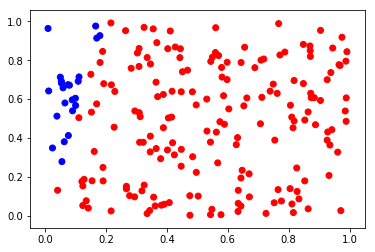

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


X = np.random.rand(2,200)

Y = (X[0]>.2*X[1]).reshape(1,200)
cols = np.where(X[0]>.2*X[1],'r','b')

plt.scatter(X[0],X[1], color =cols)
plt.show()

### Create Tensorflow Graph

In [4]:
#Placeholders are input and output variables
y = tf.placeholder(tf.float32,[None,1])
x = tf.placeholder(tf.float32,[None,2])

#Variables represent trainable parameters
W = tf.Variable(tf.zeros([2,1]))
B = tf.Variable(tf.zeros([1,1]))


node = tf.add(tf.matmul(x,W),B)
z = tf.sigmoid(node)


### Implement Cost Function

In [5]:
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = node, labels = y))

optimizer = tf.train.GradientDescentOptimizer(.1)

train = optimizer.minimize(loss)

### Begin TensorFlow Session

In [6]:
sess = tf.Session()
init= tf.global_variables_initializer()
sess.run(init)


### Train Neural Network

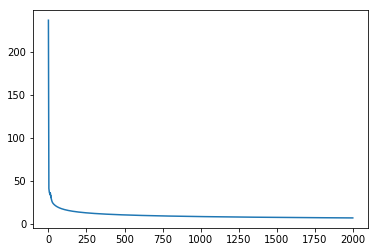

In [7]:
loss_data= []
for i in range(2000):
    sess.run(train,feed_dict={x:X.T,y:Y.T})
    loss_data.append(sess.run(loss,feed_dict={x:X.T,y:Y.T}))

plt.plot(range(2000),loss_data)
plt.show()

### Create new data for testing

In [23]:
X_test = np.random.rand(2,1000)
Y_test = (X_test[0]>.2*X_test[1]).reshape(1,1000)[0]


Test Accuracy:0.99


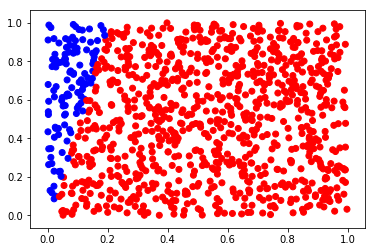

In [22]:
preds = np.where(sess.run(z,feed_dict={x:(X_test.T)}).T[0] > .5, 1, 0)
print("Test Accuracy:"+str(np.sum(preds == Y_test)/Y_test.shape[0]))
cols = np.where(sess.run(z,feed_dict={x:(X_test.T)}).T[0] > .5, 'r', 'b')
plt.scatter(X_test[0],X_test[1], color = cols)
plt.show()

# Non-Linear Decision Boundary

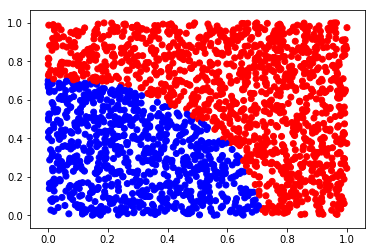

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


X_train = np.random.rand(2,2000)

Y_train = (X_train[1]**2 + X_train[0]**2>.5).astype(int).reshape(1,2000)

X_test = np.random.rand(2,1000)

Y_test = (X_test[1]**2 + X_test[0]**2>.5).astype(int).reshape(1,1000)

cols = np.where(Y_train[0] > .5,'r','b')
cols_test = np.where(Y_test[0] > .5,'r','b')

plt.scatter(X_train[0],X_train[1], color =cols)
plt.show()

## Functions Create NN Model

In [25]:
def create_placeholders(n_x,n_y):
    
    X = tf.placeholder(shape=[None,n_x],dtype = tf.float32)
    Y = tf.placeholder(shape=[None,n_y],dtype = tf.int32)
    
    return X,Y

def initialize_parameters(layer_dims):
    
    parameters = {}
    for l in range(len(layer_dims)-1):
        
        W = tf.get_variable("W" + str(l+1),[layer_dims[l],layer_dims[l+1]])
        B = tf.Variable(tf.zeros([1,layer_dims[l+1]]))
        
        parameters["W" + str(l+1)] = W
        parameters["B" + str(l+1)] = B
        
    
    return parameters

def forward_propagation(X,parameters,layer_dims):
    
    A = X
    for l in range(len(layer_dims)-1):
        W = parameters["W" + str(l+1)]
        B = parameters["B" + str(l+1)]
        Z = tf.add(tf.matmul(A,W),B)
        
        if l < len(layer_dims) - 2:
            A = tf.nn.relu(Z)
        else:
            A = tf.nn.sigmoid(Z)
    
    return A,Z

def compute_loss(Z,Y):
    
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z , labels = tf.cast(Y,tf.float32)))
    
    return loss

def model(layer_dims,X_train,Y_train,X_test,Y_test,learning_rate = .001,epochs = 1000, batch_size = 32):
    
    tf.reset_default_graph()
    
    X,Y = create_placeholders(X_train.shape[0],Y_train.shape[0])
    
    parameters = initialize_parameters(layer_dims)
    
    AL,ZL = forward_propagation(X,parameters,layer_dims)
    
    loss = compute_loss(ZL,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

    train = optimizer.minimize(loss)
    
    sess = tf.Session()
    init= tf.global_variables_initializer()
    sess.run(init)
    
    loss_data = []
    for epoch in range(epochs):
        for m in range(0,int(X_train.shape[1] / batch_size)):
            X_batch = X_train.T[m*batch_size:(m+1)*batch_size]
            Y_batch = Y_train.T[m*batch_size:(m+1)*batch_size]
            sess.run(train,feed_dict={X:X_batch,Y:Y_batch})
        

        X_batch = X_train.T[(m+1)*batch_size:]
        Y_batch = Y_train.T[(m+1)*batch_size:]
        sess.run(train,feed_dict={X:X_batch,Y:Y_batch})
        loss_data.append(sess.run(loss,feed_dict={X:X_batch,Y:Y_batch}))

        epoch = epoch + 1
    
    parameters = sess.run(parameters)
    
    predictions = tf.cast(tf.greater(AL,.5),tf.int32)  
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions,Y),tf.float32))
    
    train_accuracy = sess.run(accuracy,feed_dict={X:X_train.T,Y:Y_train.T})
    test_accuracy = sess.run(accuracy,feed_dict={X:X_test.T,Y:Y_test.T})
    
    preds_train = sess.run(tf.cast(predictions,tf.int32),feed_dict={X:X_train.T,Y:Y_train.T})
    preds_test = sess.run(tf.cast(predictions,tf.int32),feed_dict={X:X_test.T,Y:Y_test.T})
    
    return preds_train,preds_test,train_accuracy,test_accuracy


    

## Create Graph, Run Training

In [38]:
tf.reset_default_graph()
layer_dims = [2,6,4,1]

tf.reset_default_graph()
    
preds_train,preds_test,train_acc,test_acc = model(layer_dims,X_train,Y_train,X_test,Y_test,epochs=2000,learning_rate=.005)

## Print Accuracy and Test Data Graph

Train Accuracy:0.997
Test Accuracy:0.994


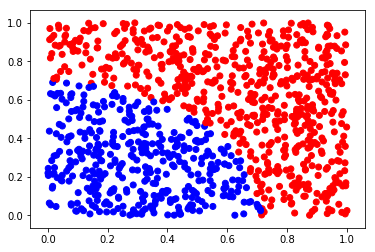

In [40]:
print("Train Accuracy:" + str(train_acc))
print("Test Accuracy:" + str(test_acc))
cols = np.where(preds_test.T[0],'r','b')
plt.scatter(X_test[0],X_test[1], color =cols)
plt.show()